In [163]:
# Project by Varun Gehlot
'''
Objectives:
 - To assess the data and prepare a fresh dataset for training and prediction 
 - To plot a bar graph to identify the relationship between two variables 
 - To visualize the major types of complaints in each city


Problem Statement:
You've been asked to analyze data on service request (311) calls from New York City. 
You've also been asked to utilize data wrangling techniques to understand
the patterns in the data and visualize the major types of complaints.
'''

"\nObjectives:\n - To assess the data and prepare a fresh dataset for training and prediction \n - To plot a bar graph to identify the relationship between two variables \n - To visualize the major types of complaints in each city\n\n\nProblem Statement:\nYou've been asked to analyze data on service request (311) calls from New York City. \nYou've also been asked to utilize data wrangling techniques to understand\nthe patterns in the data and visualize the major types of complaints.\n"

In [164]:
#Importing and visualizing the Dataset
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from scipy.stats import kruskal

df = pd.read_csv("311_Service_Requests_from_2010_to_Present.csv")
df.head()

C:\Users\Varun Gehlot\AppData\Local\Temp\ipykernel_7964\3805562066.py:8: DtypeWarning: Columns (48,49) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("311_Service_Requests_from_2010_to_Present.csv")


,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [165]:
#printing the columns of the DataFrame
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [166]:
#identifying the shape of the dataset
df.shape

(364558, 53)

In [167]:
#identify the variables with null values
null_counts = df.isnull().sum()
print(null_counts)

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

In [168]:
null_values_variables = null_counts[null_counts > 0]
print(null_values_variables)

Closed Date                         2381
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Due Date                               3
Resolution Action Updated Date      2402
X Coordinate (State Plane)          4030
Y Coordinate (State Plane)          4030
School Region                          1
School Code                            1
School Zip                             1
School or Citywide Complaint      364558
Vehicle Type                      364558
Taxi Company Borough              364558
Taxi Pick Up Loc

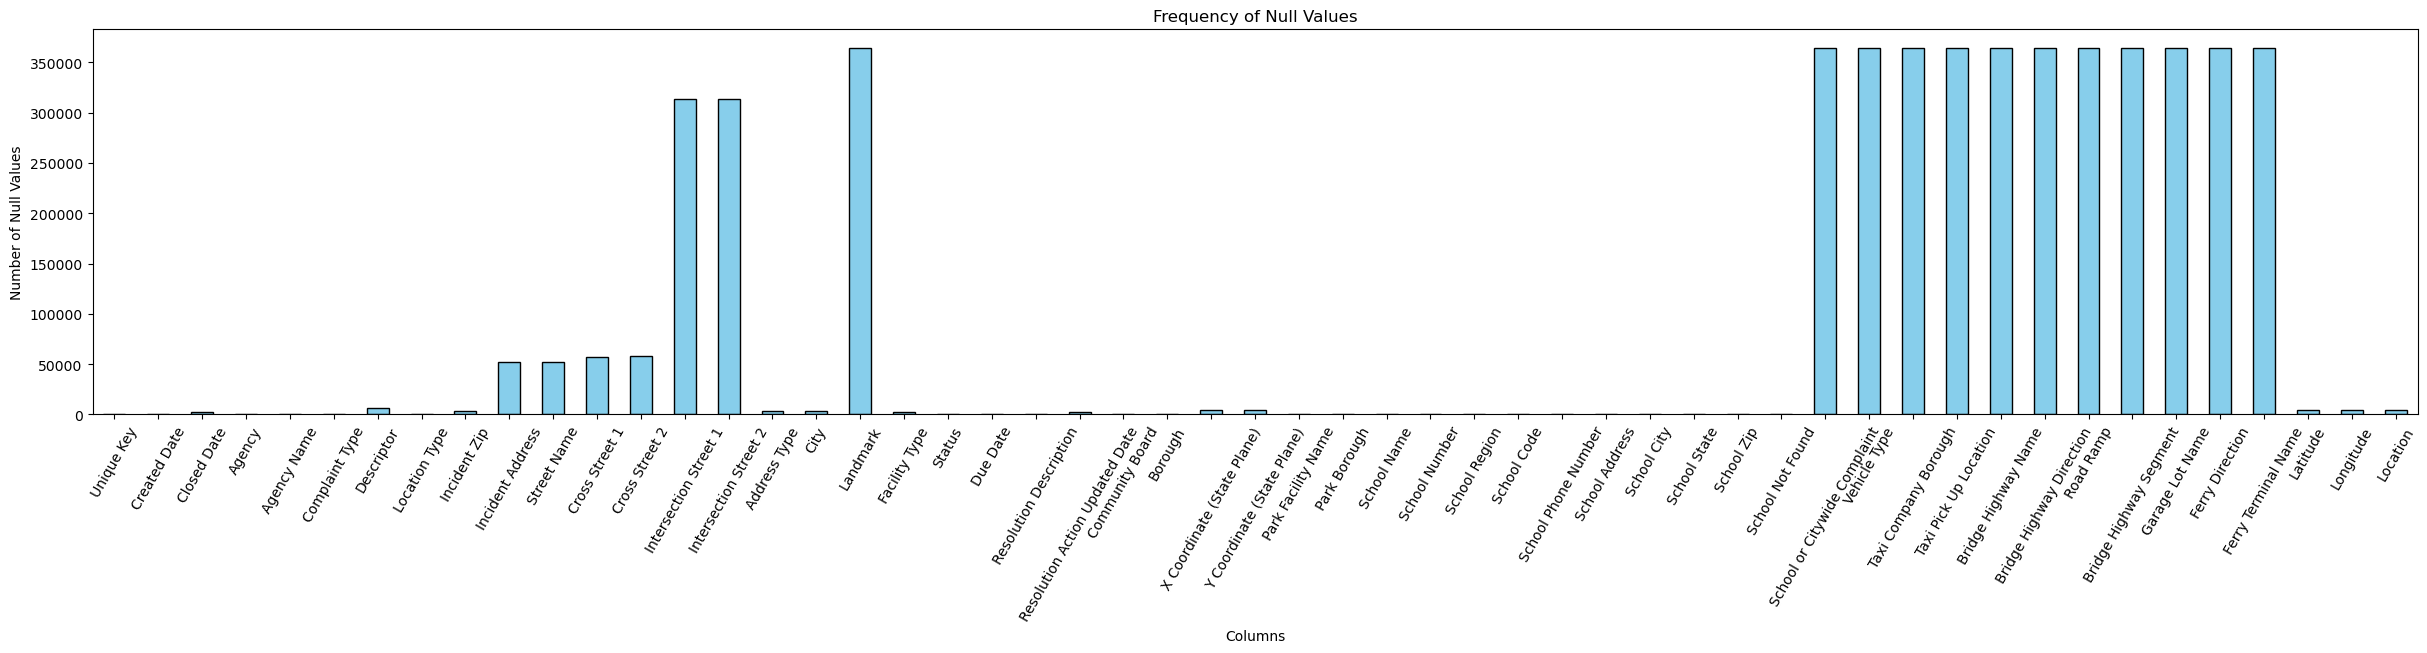

In [169]:
#draw a freq. plot to show the no. of null values in each column of the DataFrame
plt.figure(figsize=(30, 5))
null_counts.plot(kind='bar', rot = 60,color='skyblue', edgecolor='black')
plt.title('Frequency of Null Values')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.show()

In [170]:
#Remove the records whose Closed Date values are null
df = df.dropna(subset=['Closed Date'])
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01/01/2016 12:55:15 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01/01/2016 01:26:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01/01/2016 04:51:03 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01/01/2016 07:43:13 AM,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01/01/2016 03:24:42 AM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [171]:
# calculate the time elapsed in closed and creation date
# convert the calculated date to seconds to get better representation

df["Created Date"] = pd.to_datetime(df["Created Date"])
df["Closed Date"] = pd.to_datetime(df["Closed Date"])
df["Calculated Date"] = (df["Closed Date"] - df["Created Date"]).dt.total_seconds()
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Calculated Date
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)",3330.0
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)",5233.0
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)",17494.0
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)",27927.0
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)",12464.0


In [172]:
# view descriptive statistics for the newly created column
df["Calculated Date"].describe()

count    3.621770e+05
mean     1.511330e+04
std      2.110255e+04
min      6.100000e+01
25%      4.533000e+03
50%      9.616000e+03
75%      1.887800e+04
max      2.134342e+06
Name: Calculated Date, dtype: float64

In [173]:
# checking the number of null values in the 'Complaint type' 
df["Complaint Type"].isnull().sum()

0

In [174]:
# and 'city'
df["City"].isnull().sum()

674

In [175]:
#impute the NA value with Unknown City
df["Unknown City"] = df["City"].isnull()
df[32:36]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location,Calculated Date,Unknown City
32,32307660,2015-12-31 23:19:22,2016-01-01 07:47:29,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10462.0,1838 MULINER AVENUE,...,NaN,NaN,NaN,NaN,NaN,40.847539,-73.861219,"(40.847538579165025, -73.86121948003017)",30487.0,False
33,32306700,2015-12-31 23:18:10,2016-01-02 01:04:03,NYPD,New York City Police Department,Illegal Parking,Double Parked Blocking Traffic,Street/Sidewalk,NaN,25-0-25-54 12TH STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92753.0,True
34,32309182,2015-12-31 23:16:06,2016-01-01 01:39:12,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11385.0,60-55 WOODBINE STREET,...,NaN,NaN,NaN,NaN,NaN,40.707448,-73.898889,"(40.70744791054564, -73.89888901250218)",8586.0,False
35,32308637,2015-12-31 23:15:27,2016-01-01 05:06:16,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11414.0,156-31 76 STREET,...,NaN,NaN,NaN,NaN,NaN,40.661266,-73.856939,"(40.66126649025677, -73.85693936667572)",21049.0,False


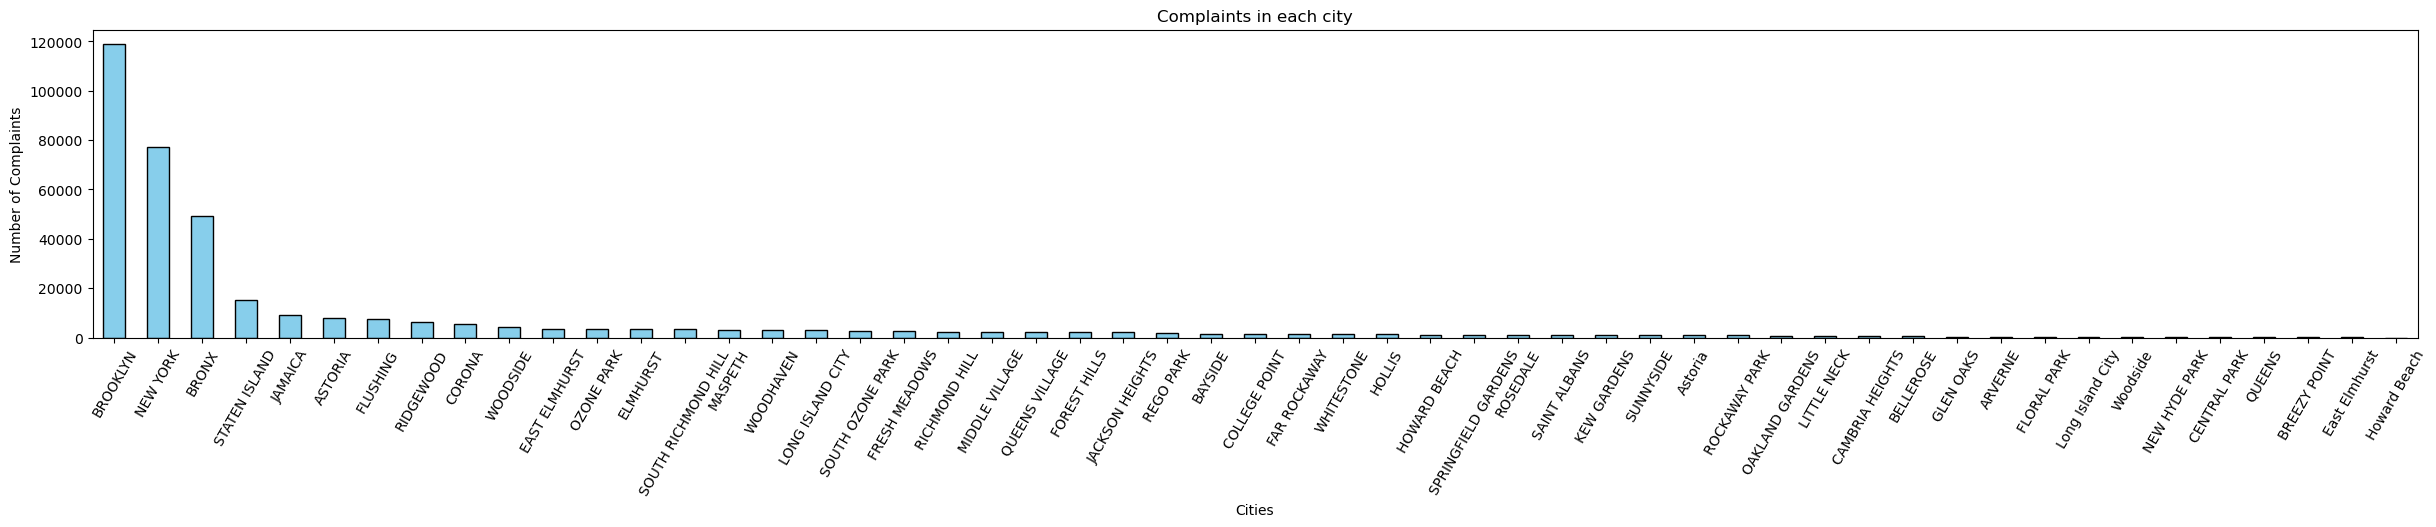

In [176]:
# Draw a frequency plot for the complaints in each city

plt.figure(figsize=(30, 4))

no_of_complaints = df["City"].value_counts()

no_of_complaints.plot(kind='bar', rot = 60,color='skyblue', edgecolor='black')
plt.title('Complaints in each city')
plt.xlabel('Cities')
plt.ylabel('Number of Complaints')

plt.show()

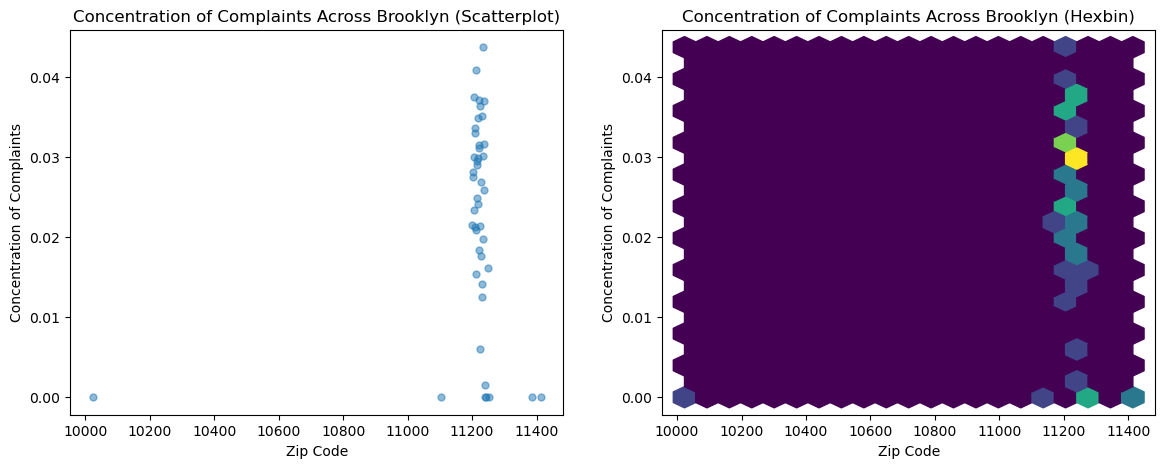

In [177]:
# Create a scatter and hexbin plot of the concentration of complaints across Brooklyn

brooklyn_data = df[df["City"] == "BROOKLYN"]

# Logic by using zip codes. 
zip_complaints = brooklyn_data.groupby('Incident Zip')['Complaint Type'].count()
zip_concentration = zip_complaints / zip_complaints.sum()

plt.figure(figsize = (14, 5))

# Plotting the graphs
plt.subplot(1, 2, 1)

plt.scatter(zip_concentration.index, zip_concentration.values, s = 25, alpha = 0.5)
plt.xlabel('Zip Code')
plt.ylabel('Concentration of Complaints')
plt.title('Concentration of Complaints Across Brooklyn (Scatterplot)')


plt.subplot(1, 2, 2)

plt.hexbin(zip_concentration.index, zip_concentration.values, gridsize = 20)
plt.xlabel('Zip Code')
plt.ylabel('Concentration of Complaints')
plt.title('Concentration of Complaints Across Brooklyn (Hexbin)')

# showing the graph
plt.show()

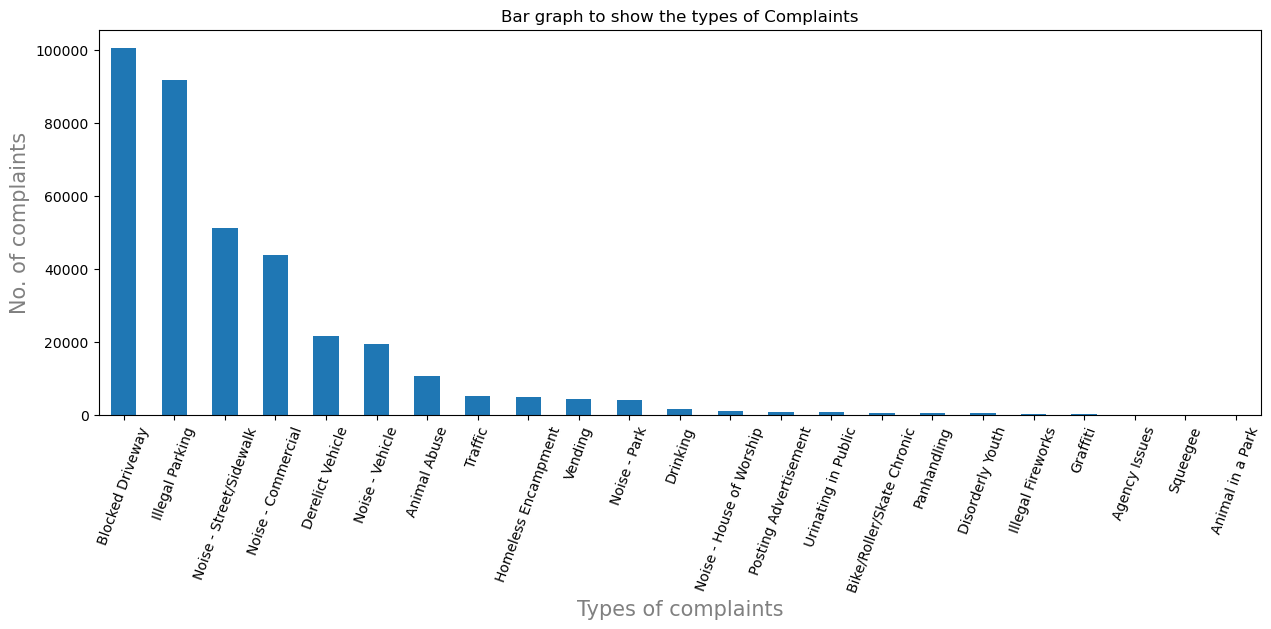

In [178]:
# Plot a bar graph to show the types of complaints
plt.figure(figsize = (15,5))

typesOfComplaints = df["Complaint Type"].value_counts()
typesOfComplaints.plot(kind = "bar", rot = 70)

plt.xlabel("Types of complaints",size = 15, color = "Grey")
plt.ylabel("No. of complaints", size = 15,color = "Grey")
plt.title("Bar graph to show the types of Complaints")

plt.show()

In [179]:
# Check the freq. of various types of complaints for New York City

new_york_data = df[df["City"] == "NEW YORK"]
nyComplaints = new_york_data["Complaint Type"].value_counts()
nyComplaints

Noise - Street/Sidewalk      22245
Noise - Commercial           18686
Illegal Parking              14549
Noise - Vehicle               6294
Homeless Encampment           3060
Blocked Driveway              2705
Vending                       2638
Animal Abuse                  1941
Traffic                       1769
Noise - Park                  1243
Derelict Vehicle               695
Drinking                       321
Urinating in Public            264
Bike/Roller/Skate Chronic      254
Noise - House of Worship       222
Panhandling                    206
Disorderly Youth                81
Posting Advertisement           49
Illegal Fireworks               38
Graffiti                        25
Squeegee                         4
Name: Complaint Type, dtype: int64

In [180]:
# Find the top 10 complaint types

typesOfComplaints[:10]

Blocked Driveway           100624
Illegal Parking             91716
Noise - Street/Sidewalk     51139
Noise - Commercial          43751
Derelict Vehicle            21518
Noise - Vehicle             19301
Animal Abuse                10530
Traffic                      5196
Homeless Encampment          4879
Vending                      4185
Name: Complaint Type, dtype: int64

In [181]:
# Display the various types of complaints in each city

city_complaints = df.groupby('City')['Complaint Type'].unique()

df_city_complaints = pd.DataFrame(city_complaints)
df_city_complaints.columns = ['Complaint Type'] 

df_city_complaints
# df_city_complaints.to_csv("Types of Complaints")

,Complaint Type
City,
ARVERNE,"[Illegal Parking, Noise - Commercial, Animal A..."
ASTORIA,"[Blocked Driveway, Noise - Commercial, Noise -..."
Astoria,"[Illegal Parking, Noise - Street/Sidewalk, Der..."
BAYSIDE,"[Blocked Driveway, Derelict Vehicle, Illegal P..."
BELLEROSE,"[Derelict Vehicle, Blocked Driveway, Noise - S..."
BREEZY POINT,"[Noise - Street/Sidewalk, Blocked Driveway, An..."
BRONX,"[Blocked Driveway, Illegal Parking, Noise - St..."
BROOKLYN,"[Illegal Parking, Blocked Driveway, Noise - Co..."
CAMBRIA HEIGHTS,"[Derelict Vehicle, Blocked Driveway, Noise - C..."


In [182]:
# Create a DataFrame, df_new, which contains cities as columns and complaint types in rows

df_new = df.groupby(['Complaint Type', 'City']).size().unstack(fill_value = 0)
df_new

City,ARVERNE,ASTORIA,Astoria,BAYSIDE,BELLEROSE,BREEZY POINT,BRONX,BROOKLYN,CAMBRIA HEIGHTS,CENTRAL PARK,...,SAINT ALBANS,SOUTH OZONE PARK,SOUTH RICHMOND HILL,SPRINGFIELD GARDENS,STATEN ISLAND,SUNNYSIDE,WHITESTONE,WOODHAVEN,WOODSIDE,Woodside
Complaint Type,,,,,,,,,,,,,,,,,,,,,
Animal Abuse,46,170,0,53,15,2,1971,3191,15,0,...,43,74,40,42,786,40,43,57,111,0
Animal in a Park,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Bike/Roller/Skate Chronic,0,16,0,0,1,0,22,124,0,0,...,0,1,1,0,10,2,4,2,5,0
Blocked Driveway,50,3436,159,514,138,3,17062,36445,177,0,...,318,1202,1946,330,2845,278,279,1363,2038,27
Derelict Vehicle,32,426,14,231,120,3,2402,6257,148,0,...,248,425,356,267,2184,17,279,369,298,8
Disorderly Youth,2,5,0,2,2,0,66,79,0,0,...,1,2,2,0,25,2,1,0,1,0
Drinking,1,43,0,1,1,1,206,291,0,0,...,3,14,25,6,188,12,3,4,15,0
Graffiti,1,4,0,3,0,0,15,60,0,0,...,0,2,0,0,6,1,1,0,4,0
Homeless Encampment,4,32,0,2,1,0,275,948,6,0,...,11,5,12,7,77,12,0,10,38,0


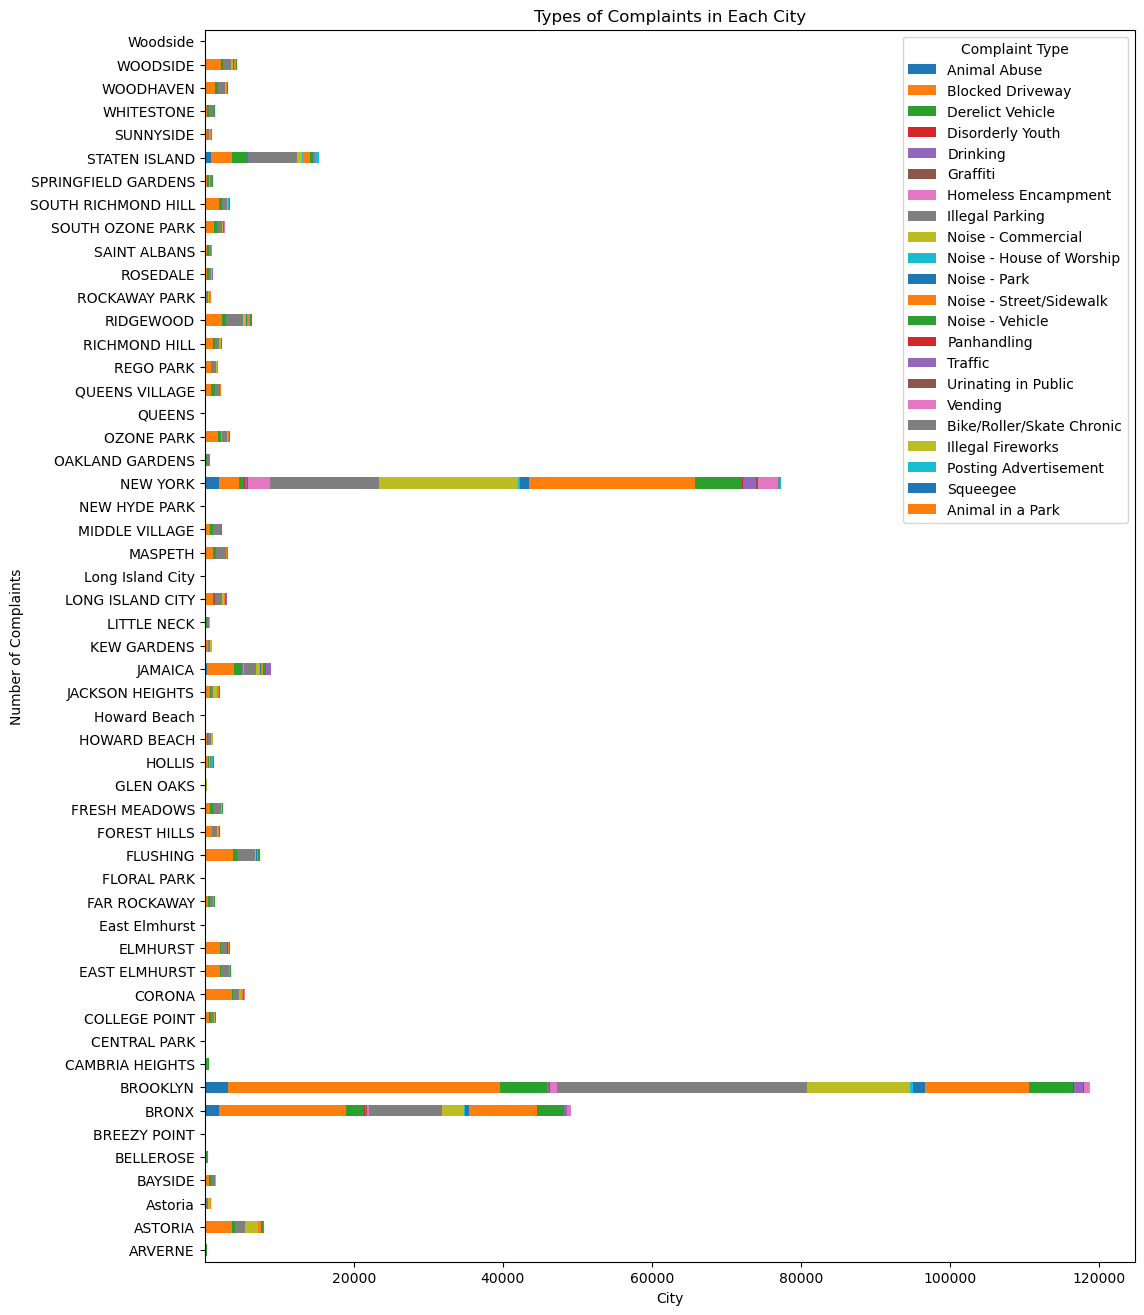

In [183]:
# Draw another chart that shows the types of complaints in each city in single chart, where different colors show different types of complaints

df_grouped = df.groupby(['City', 'Complaint Type']).size().unstack(fill_value=0)

df_grouped.plot(kind='barh', stacked=True, figsize=(12,16))

plt.title('Types of Complaints in Each City')
plt.xlabel('City')
plt.ylabel('Number of Complaints')
plt.legend(title='Complaint Type', loc='upper right')
plt.show()

In [184]:
# Sort the complaint types based on the average Request_Closing_Time grouping them for different locations 
df["Created Date"] = pd.to_datetime(df["Created Date"])
df["Closed Date"] = pd.to_datetime(df["Closed Date"])
df["Request_Closing_Time"] = df["Closed Date"] - df["Created Date"]

df_g = df.groupby(['Location', 'Complaint Type']).agg({'Request_Closing_Time': 'mean'})

df_sorted = df_g.sort_values('Request_Closing_Time')
df_sorted

,,Request_Closing_Time
Location,Complaint Type,
"(40.72895633655987, -74.00074325193769)",Noise - Commercial,0 days 00:02:37
"(40.678429539269835, -73.98361397723242)",Noise - Commercial,0 days 00:02:37
"(40.76848580086362, -73.91235250532725)",Noise - Vehicle,0 days 00:02:43
"(40.69371028050496, -73.95499211670034)",Illegal Parking,0 days 00:02:47
"(40.764596652420956, -73.97372678473167)",Noise - Street/Sidewalk,0 days 00:02:49
...,...,...
"(40.64465625507198, -73.95663234950166)",Derelict Vehicle,8 days 08:36:22.500000
"(40.64466438582295, -73.95635848114169)",Derelict Vehicle,9 days 07:21:06
"(40.64496727639598, -73.95897801142875)",Derelict Vehicle,9 days 07:22:12


In [185]:
# See whether the average response time across different complaint types is similar (overall)
df_avg_time = df.groupby("Complaint Type")["Request_Closing_Time"].mean()
df_avg_time

Complaint Type
Agency Issues                  0 days 05:04:49.125000
Animal Abuse                0 days 05:00:32.556030389
Animal in a Park                     14 days 00:50:34
Bike/Roller/Skate Chronic   0 days 03:38:43.688421052
Blocked Driveway            0 days 04:30:32.521515741
Derelict Vehicle            0 days 07:02:39.600102239
Disorderly Youth            0 days 03:26:03.749206349
Drinking                    0 days 03:50:21.300569800
Graffiti                    0 days 06:27:56.343949044
Homeless Encampment         0 days 04:17:31.384505021
Illegal Fireworks           0 days 02:48:33.482558139
Illegal Parking             0 days 04:20:50.435670984
Noise - Commercial          0 days 03:04:45.760531187
Noise - House of Worship    0 days 03:09:51.087078651
Noise - Park                0 days 03:23:46.055514795
Noise - Street/Sidewalk     0 days 03:23:51.295410547
Noise - Vehicle             0 days 03:29:21.800010362
Panhandling                 0 days 04:24:13.550769230
Posting Adver

In [187]:
# Kruskal-Wallis H test, p-value

data = {}
for complaint_type in df["Complaint Type"].unique():
    data[complaint_type] = df[df["Complaint Type"] == complaint_type]["Request_Closing_Time"]

h, p = kruskal(*data.values())

# Print the test statistic and p-value
print("Kruskal-Wallis H-test statistic:", h)
print("p-value:", p)


Kruskal-Wallis H-test statistic: 11988.269402358468
p-value: 0.0
